In [6]:
# 📓 10_smote_creditcard.ipynb

# === 1. Setup ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append(os.path.abspath("../"))
from src.utils import load_csv

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid")

In [7]:
# === 2. Load Cleaned Creditcard Data ===
df = load_csv("../data/processed/creditcard_cleaned.csv")

[INFO] Loaded data: ../data/processed/creditcard_cleaned.csv | Shape: (284807, 31)


In [8]:
# === 3. Split features and target ===
X = df.drop(columns=["Class"])
y = df["Class"]

In [9]:
# === 4. Train-test split (just for SMOTE baseline) ===
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Keep only numeric columns for SMOTE
X_numeric = X_train.select_dtypes(include=["int64", "float64"])

# === 5. Apply SMOTE ===
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_numeric, y_train)

[INFO] Saved class distribution plot: ../reports/figures/creditcard_fig/creditcard_class_dist_after_smote.png
[INFO] Saved balanced dataset to: ../data/processed/creditcard_balanced_smote.csv
[INFO] Reloaded shape: (454902, 31)
[INFO] Class distribution:
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64


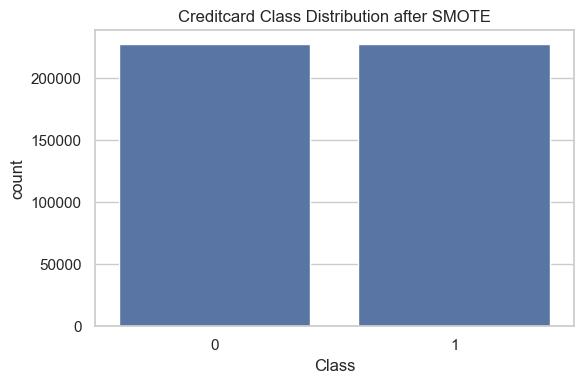

In [11]:
# === 6. Visualize result ===
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x=y_res, ax=ax)
ax.set_title("Creditcard Class Distribution after SMOTE")
plt.tight_layout()

# Save figure
fig_path = "../reports/figures/creditcard_fig/creditcard_class_dist_after_smote.png"
os.makedirs(os.path.dirname(fig_path), exist_ok=True)
fig.savefig(fig_path)
print(f"[INFO] Saved class distribution plot: {fig_path}")

# === 7. Merge and Save Balanced Dataset ===
X_res["Class"] = y_res
out_path = "../data/processed/creditcard_balanced_smote.csv"
X_res.to_csv(out_path, index=False)
print(f"[INFO] Saved balanced dataset to: {out_path}")

# === 8. Check Result ===
check = pd.read_csv(out_path)
print("[INFO] Reloaded shape:", check.shape)
print("[INFO] Class distribution:\n", check['Class'].value_counts(normalize=True))